<a href="https://colab.research.google.com/github/avi78/Tensorflow-Day-2/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.applications import vgg16

In [3]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
Y_train.shape

(50000, 1)

In [6]:
cifar_10_classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

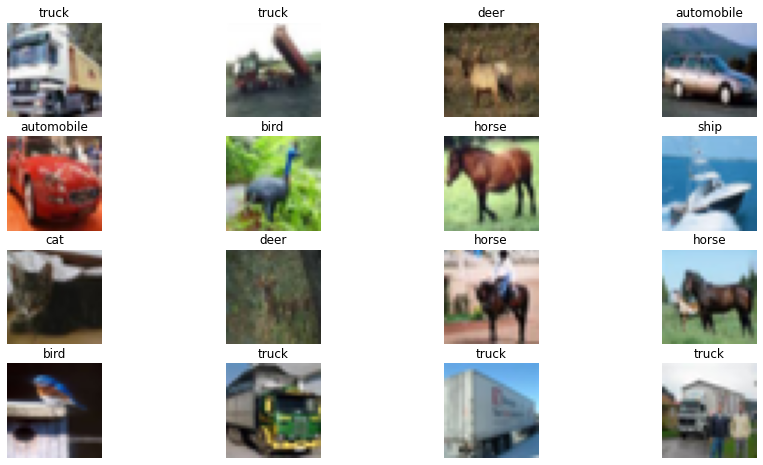

In [7]:
plt.figure(figsize=(15,8))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(X_train[i+1])
  plt.title(cifar_10_classes[Y_train[i+1][0]])
  plt.axis("off")

In [8]:
X_train = X_train/255
X_test = X_test/255



In [9]:
Y_train=tf.keras.utils.to_categorical(Y_train)
Y_test= tf.keras.utils.to_categorical(Y_test)

In [10]:
Y_train[100]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

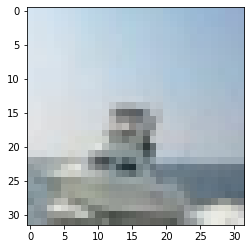

In [11]:
plt.imshow(X_train[100])

In [12]:
base_model = vgg16.VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3))

58889256/58889256 [==============================] - 3s 0us/step


In [13]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


In [15]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [16]:
tf.keras.callbacks.Callback()

In [17]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


In [18]:
callback_used = [early_stopping,model_checkpoint_callback]

In [32]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,callbacks=callback_used)

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3599 - accuracy: 0.5104 - val_loss: 1.5198 - val_accuracy: 0.4673
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3583 - accuracy: 0.5122 - val_loss: 1.4934 - val_accuracy: 0.4736
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3515 - accuracy: 0.5149 - val_loss: 1.4684 - val_accuracy: 0.4732
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3470 - accuracy: 0.5159 - val_loss: 1.5824 - val_accuracy: 0.4471
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3410 - accuracy: 0.5190 - val_loss: 1.4830 - val_accuracy: 0.4766


In [34]:
import pandas as pd
ne=history.epoch
data= pd.DataFrame(history.history)
data

,loss,accuracy,val_loss,val_accuracy
0,1.359949,0.51038,1.519770,0.4673
1,1.358326,0.51220,1.493382,0.4736
2,1.351459,0.51492,1.468361,0.4732
3,1.346966,0.51588,1.582391,0.4471
4,1.340990,0.51900,1.483024,0.4766


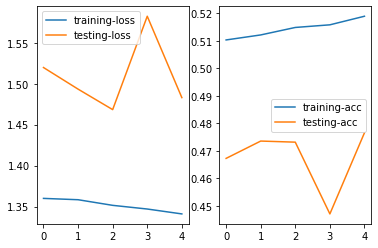

In [35]:
plt.subplot(1,2,1)
plt.plot(ne,data['loss'],label="training-loss")    #x axis
plt.plot(ne,data['val_loss'],label="testing-loss") #y axis
plt.legend()
plt.subplot(1,2,2)
plt.plot(ne,data['accuracy'],label="training-acc")    #x axis
plt.plot(ne,data['val_accuracy'],label="testing-acc") #y axis
plt.legend()